In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
!pip install split-folders

In [4]:
!splitfolders --output dataset --ratio 0.8 0.1 0.1 -- RiceDiseases

Copying files: 2254 files [00:01, 2088.29 files/s]


In [40]:
train_generator.class_indices

{'Bacterial_Leaf_Blight': 0,
 'Brown_Spot': 1,
 'Healthy': 2,
 'Leaf_Scald': 3,
 'Narrow_Brown_Spot': 4}

In [41]:
class_names = list(train_generator.class_indices.keys())
class_names

['Bacterial_Leaf_Blight',
 'Brown_Spot',
 'Healthy',
 'Leaf_Scald',
 'Narrow_Brown_Spot']

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="AugmentedImages"
)

Found 1802 images belonging to 5 classes.


In [43]:
count=0
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break


[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


In [44]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 223 images belonging to 5 classes.


In [45]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 229 images belonging to 5 classes.


In [9]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


#### Build The Model


In [10]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 5

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [12]:
#Model Compile

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [14]:
1802/32

56.3125

In [15]:
223/32

6.96875

In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch=56,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=50,
)

Epoch 1/50
56/56 [==============================] - 58s 1s/step - loss: 1.4711 - accuracy: 0.3294 - val_loss: 0.9830 - val_accuracy: 0.6042
Epoch 2/50
56/56 [==============================] - 61s 1s/step - loss: 1.0106 - accuracy: 0.5960 - val_loss: 1.0694 - val_accuracy: 0.5469
Epoch 3/50
56/56 [==============================] - 59s 1s/step - loss: 0.8679 - accuracy: 0.6525 - val_loss: 0.8618 - val_accuracy: 0.6562
Epoch 4/50
56/56 [==============================] - 58s 1s/step - loss: 0.7820 - accuracy: 0.7023 - val_loss: 0.7352 - val_accuracy: 0.6927
Epoch 5/50
56/56 [==============================] - 65s 1s/step - loss: 0.7118 - accuracy: 0.7282 - val_loss: 0.6536 - val_accuracy: 0.7448
Epoch 6/50
56/56 [==============================] - 68s 1s/step - loss: 0.5918 - accuracy: 0.7763 - val_loss: 0.5970 - val_accuracy: 0.7812
Epoch 7/50
56/56 [==============================] - 65s 1s/step - loss: 0.5622 - accuracy: 0.7898 - val_loss: 0.5788 - val_accuracy: 0.7604
Epoch 8/50
56/56 [==

In [18]:
scores = model.evaluate(test_generator)

8/8 [==============================] - 5s 607ms/step - loss: 0.1180 - accuracy: 0.9607


In [19]:
scores

[0.11795555055141449, 0.960698664188385]

In [20]:
history


In [21]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 56}

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [23]:
history.history['accuracy']

[0.32937854528427124,
 0.596045196056366,
 0.6525423526763916,
 0.70225989818573,
 0.7282485961914062,
 0.7762711644172668,
 0.7898305058479309,
 0.8135592937469482,
 0.8310734629631042,
 0.8299434781074524,
 0.8350282311439514,
 0.8502824902534485,
 0.8564971685409546,
 0.8841807842254639,
 0.888700544834137,
 0.897175133228302,
 0.909604549407959,
 0.9107344746589661,
 0.8875706195831299,
 0.9271186590194702,
 0.9367231726646423,
 0.9135593175888062,
 0.9186440706253052,
 0.9220339059829712,
 0.9451977610588074,
 0.9474576115608215,
 0.9497175216674805,
 0.9531073570251465,
 0.9689265489578247,
 0.9649717807769775,
 0.9531073570251465,
 0.9316384196281433,
 0.9649717807769775,
 0.9553672075271606,
 0.9587570428848267,
 0.9757062196731567,
 0.9757062196731567,
 0.9728813767433167,
 0.9689265489578247,
 0.9581921100616455,
 0.9723163843154907,
 0.9807909727096558,
 0.9830508232116699,
 0.9536722898483276,
 0.9757062196731567,
 0.9615819454193115,
 0.9576271176338196,
 0.979660987854003

In [24]:
len(history.history['accuracy'])

50

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

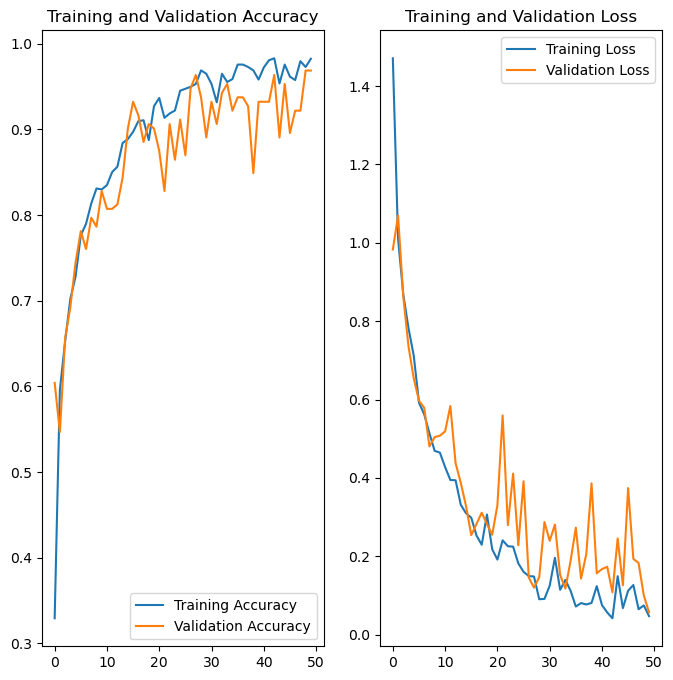

In [27]:
EPOCHS = 50

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Healthy
1/1 [==============================] - 0s 260ms/step
predicted label: Healthy


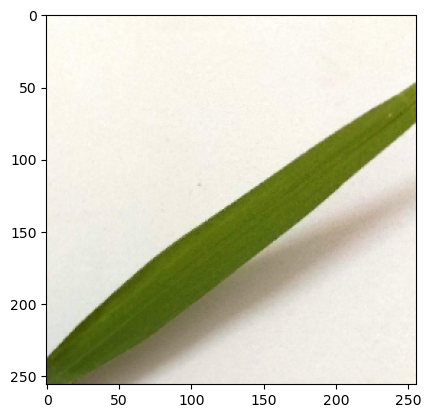

In [47]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [48]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    cofidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, cofidence

In [32]:
import numpy as np

In [50]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 15ms/step


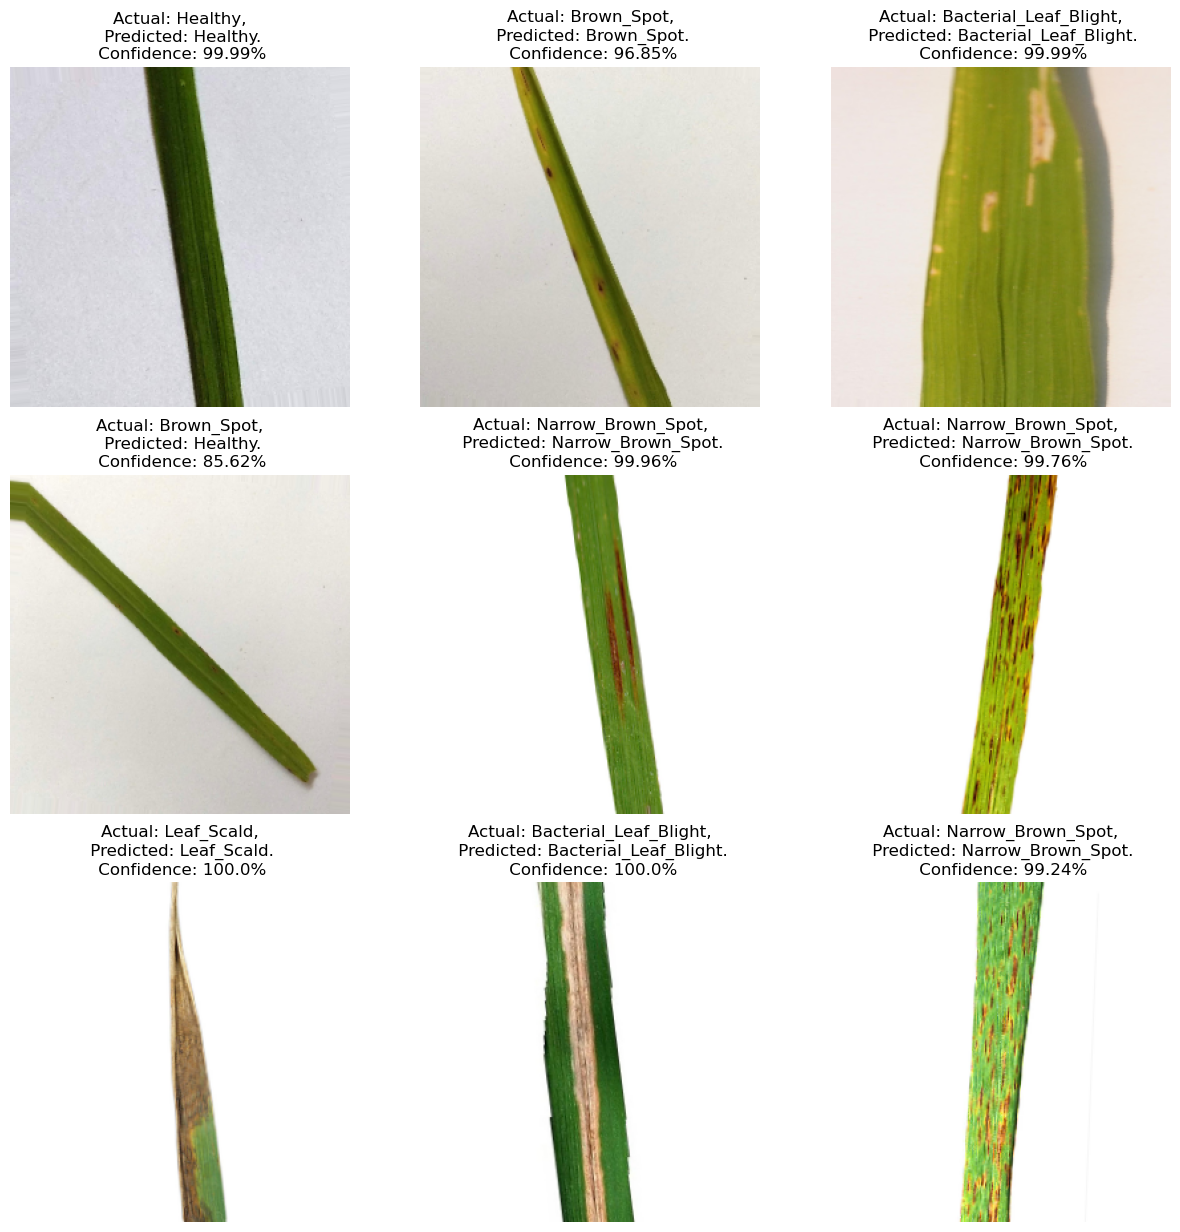

In [51]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [52]:
model.save("../rice.h5")

/Users/piuminavoda/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
